In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# save_path = '../results_final_Dec22/'
save_path = '../results_final_Jan15/'
pval_df = pd.read_csv(save_path + 'granger_T_extreme_p.csv', index_col=0)
coef_df = pd.read_csv(save_path + 'granger_T_extreme_c.csv', index_col=0)

In [3]:
pval_df.head()

NOC2L_y    HES4_y   ISG15_y  ERRFI1_y    ENO1_y     PGD_y  \
HES4_x    0.096487  1.000000  0.282244  0.973778  0.315458  0.263665   
CENPS_x   0.135900  0.935632  0.073118  0.000608  0.090138  0.715410   
RUNX3_x   0.271927  0.627158  0.682692  0.655920  0.286019  0.619380   
AHDC1_x   0.525046  0.182303  0.742161  0.293655  0.097503  0.399748   
ZBTB8A_x  0.737763  0.532134  0.001560  0.006506  0.438298  0.633331   

           CENPS_y     SRM_y   PLOD1_y   EFHD2_y  ...  MT-ATP6_y  MT-CO3_y  \
HES4_x    0.217766  0.050955  0.449949  0.387403  ...   0.788435  0.780316   
CENPS_x   1.000000  0.009550  0.516359  0.019465  ...   0.491879  0.459357   
RUNX3_x   0.017320  0.811476  0.396290  0.063690  ...   0.453794  0.264490   
AHDC1_x   0.294147  0.533338  0.372955  0.335924  ...   0.071799  0.170624   
ZBTB8A_x  0.632573  0.002969  0.897974  0.820379  ...   0.429023  0.623113   

          MT-ND3_y  MT-ND4L_y  MT-ND4_y  MT-ND5_y  MT-ND6_y  MT-CYB_y  \
HES4_x    0.643377   0.803533  0.850093  0.878204  0.098244  0.868134   
CENPS_x   0.907406   0.665831  0.291293  0.197346  0.588843  0.445113   
RUNX3_x   0.511592   0.679286  0.221368  0.167477  0.370108  0.314417   
AHDC1_x   0.101102   0.002789  0.007935  0.014544  0.725145  0.116199   
ZBTB8A_x  0.254593   0.082963  0.559809  0.370988  0.828894  0.525478   

            CDH1_y   GAPDH_y  
HES4_x    0.585821  0.073640  
CENPS_x   0.043704  0.684079  
RUNX3_x   0.627704  0.723507  
AHDC1_x   0.394543  0.195300  
ZBTB8A_x  0.171517  0.033779  

[5 rows x 1970 columns]

In [4]:
coef_df.head()

NOC2L_y    HES4_y   ISG15_y  ERRFI1_y     ENO1_y     PGD_y  \
HES4_x    0.514189 -0.255157  0.731639  0.016345   2.026127 -0.918631   
CENPS_x  -0.241053 -0.010918  0.524051  0.516018  -1.615780  0.159309   
RUNX3_x  -0.511831  0.131928 -0.320872 -0.210277  -2.776576  0.422233   
AHDC1_x   0.790966  0.924538  1.758456  1.510992  12.151548 -1.771863   
ZBTB8A_x  0.690893  0.724401  9.238139  3.965181  12.632344 -1.434135   

           CENPS_y     SRM_y   PLOD1_y   EFHD2_y  ...  MT-ATP6_y   MT-CO3_y  \
HES4_x   -0.760764  1.819689  0.273225 -0.530157  ...   1.351228   2.722031   
CENPS_x   0.265150  1.015681  0.098355  1.194733  ...   1.498629   3.060441   
RUNX3_x  -1.192294 -0.260584  0.291548 -0.970199  ...   4.002107  10.826077   
AHDC1_x  -1.750981  2.820514 -1.731676 -1.562483  ... -30.890008 -54.966629   
ZBTB8A_x -1.408300  9.521009  0.237423  0.658146  ... -24.978535 -28.577040   

           MT-ND3_y  MT-ND4L_y   MT-ND4_y   MT-ND5_y  MT-ND6_y   MT-CYB_y  \
HES4_x     1.852100   0.147030   1.781396  -0.257754  1.729061   1.109752   
CENPS_x    0.205946   0.118811   4.243023   0.912202  0.298724   2.171518   
RUNX3_x    2.964537   0.266468  11.569006   2.200166  0.962745   6.934125   
AHDC1_x  -20.615340  -4.109354 -95.592061 -13.543296 -1.799316 -40.305417   
ZBTB8A_x -23.940967  -5.516871 -36.333855  -9.558386  1.056605 -26.793171   

            CDH1_y    GAPDH_y  
HES4_x    0.053379   3.397837  
CENPS_x  -0.072922   0.526442  
RUNX3_x  -0.043614   0.968964  
AHDC1_x  -0.251085   6.890224  
ZBTB8A_x -0.471528  17.369579  

[5 rows x 1970 columns]

In [5]:
# log_pval_df = -np.log10(pval_df)
log_pval_df = -np.log(pval_df + 2 ** -10)
coef_sign_df = np.sign(coef_df)
signed_score_df = log_pval_df * coef_sign_df

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


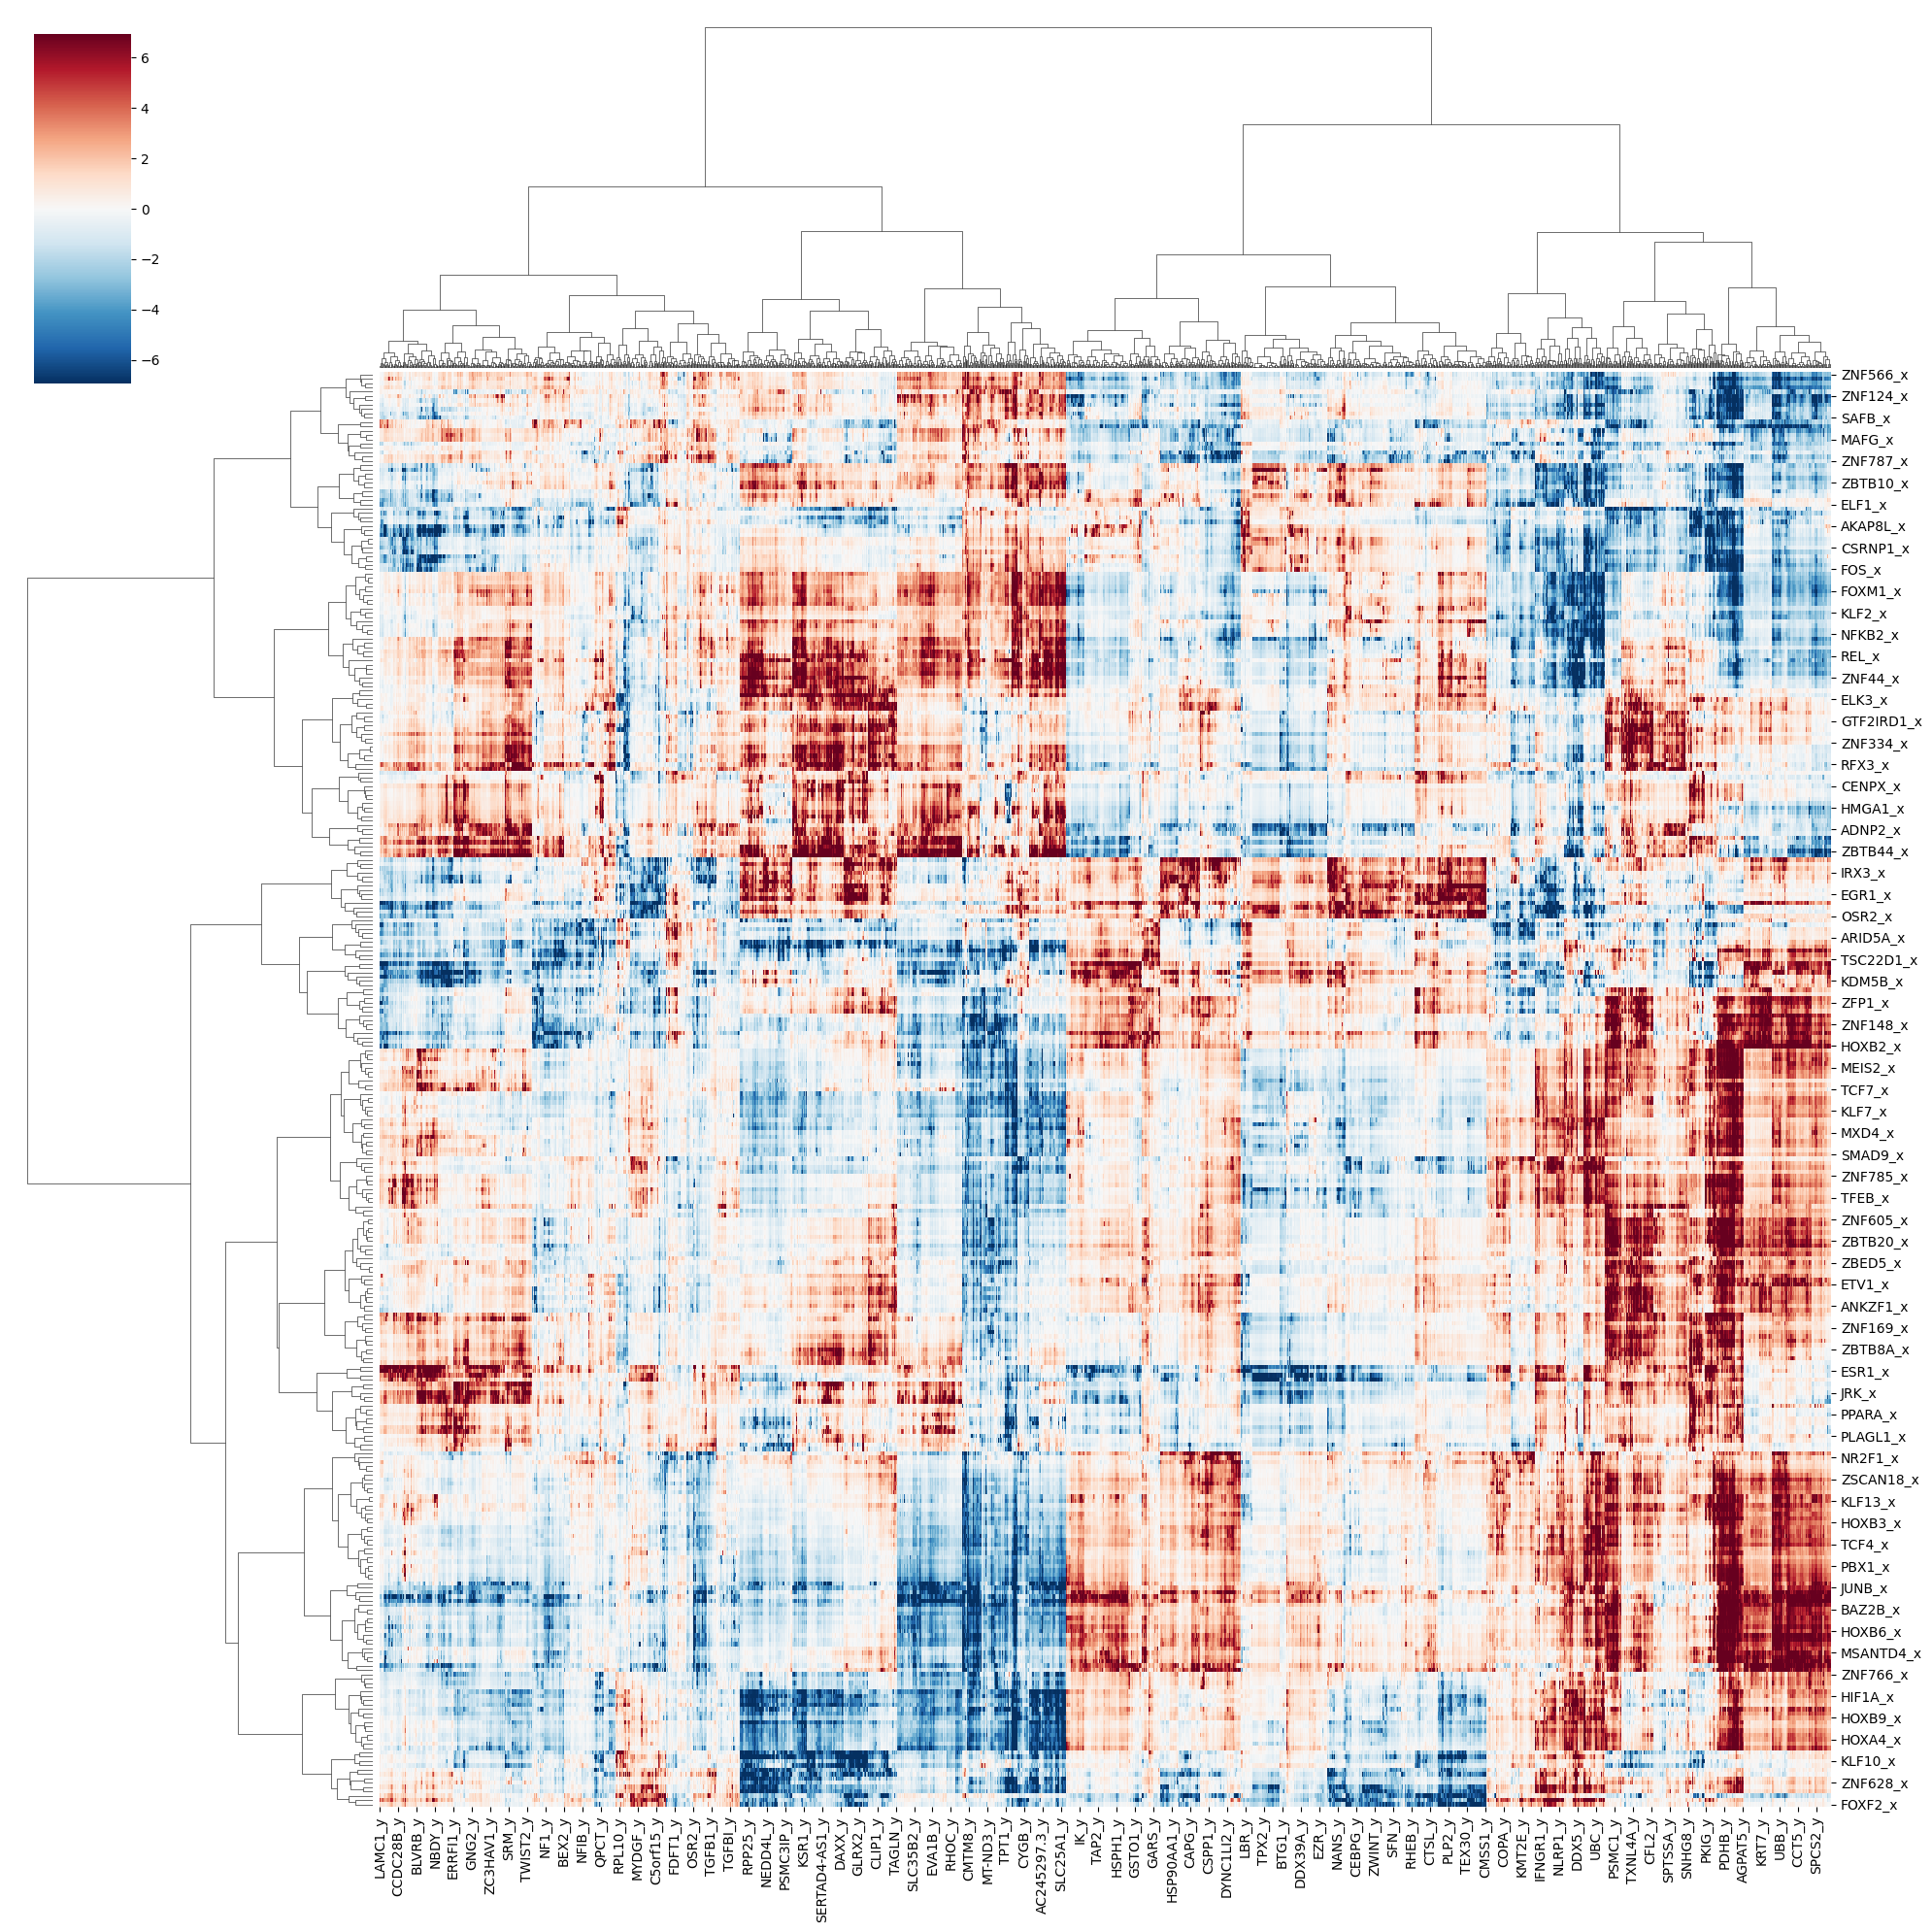

In [6]:
sns.clustermap(signed_score_df, cmap='RdBu_r',
               center=0, figsize=(20,20),
               method='ward',  # Ward's method tends to create more compact clusters
               metric='euclidean',  # Euclidean distance will separate positive/negative values
               row_cluster=True,
               col_cluster=True)

In [7]:
import scanpy as sc


from sklearn.preprocessing import StandardScaler
import seaborn as sns

adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')
gene_names = adata.var_names.to_numpy()

traj = np.load(f"../results_final_Dec22/traj_gene_space_T_extreme.npy", allow_pickle=True)

# sc.pp.highly_variable_genes(adata, n_top_genes=400)
alex_genes = open('../data/alex_genes.txt').read().splitlines()
alex_tfs = open('../data/alex_tfs.txt').read().splitlines()

alex_gene_all = list(set(alex_genes) | set(alex_tfs))
alex_gene_all_mask = np.isin(adata.var_names, alex_gene_all)
traj = traj[:, :, alex_gene_all_mask]
gene_names = adata.var_names[alex_gene_all_mask]

traj_mean = traj.mean(axis=1)
traj_std = traj.std(axis=1)
traj_mean_std = traj_mean.std(axis=0)
zero_std_genes = traj_mean_std == 0
gene_names = np.array(gene_names)[~zero_std_genes]
traj, traj_mean, traj_std, traj_mean_std = traj[..., ~zero_std_genes], traj_mean[..., ~zero_std_genes], traj_std[..., ~zero_std_genes], traj_mean_std[..., ~zero_std_genes]
# traj_mean_normalized = (traj_mean - traj_mean.mean(axis=0)) / traj_mean.std(axis=0)
traj_mean_normalized = (traj_mean - traj_mean.min(axis=0)) / (traj_mean.max(axis=0) - traj_mean.min(axis=0))
trends_df = pd.DataFrame(traj_mean_normalized, columns=gene_names, index=[f't{i}' for i in range(traj_mean_normalized.shape[0])]).T


t0        t1        t2        t3        t4        t5        t6  \
TSC22D2  0.992839  0.994952  0.997797  1.000000  0.999397  0.995183  0.988097   
NPW      0.999537  1.000000  0.998140  0.994430  0.989854  0.984220  0.977315   
HCFC1R1  1.000000  0.981203  0.962673  0.944272  0.923947  0.901680  0.876444   
ACTR3    0.974574  0.978643  0.984808  0.992474  0.997880  1.000000  0.997989   
DDX18    0.951352  0.965927  0.978922  0.989669  0.996985  1.000000  0.998389   
...           ...       ...       ...       ...       ...       ...       ...   
AHDC1    0.719294  0.694064  0.668915  0.645509  0.624247  0.604871  0.586163   
TMEM59   0.001640  0.000155  0.000000  0.001340  0.003774  0.007441  0.011701   
RTCB     0.417900  0.453173  0.488870  0.524859  0.558567  0.588747  0.615354   
MT-ATP6  0.775261  0.740617  0.704457  0.667769  0.629687  0.589235  0.545340   
TFEB     0.243972  0.233075  0.221496  0.210502  0.201223  0.193702  0.187456   

               t7        t8        t9  ...       t90       t91       t92  \
TSC22D2  0.979771  0.968635  0.955491  ...  0.133973  0.135965  0.135857   
NPW      0.971372  0.963153  0.952944  ...  0.476282  0.474260  0.464187   
HCFC1R1  0.850814  0.822508  0.790394  ...  0.355385  0.357133  0.356680   
ACTR3    0.991008  0.977669  0.957855  ...  0.293342  0.306023  0.315589   
DDX18    0.991776  0.976928  0.956584  ...  0.401167  0.413014  0.419099   
...           ...       ...       ...  ...       ...       ...       ...   
AHDC1    0.571130  0.558481  0.546726  ...  0.981013  0.983663  0.986025   
TMEM59   0.015177  0.019273  0.022978  ...  0.776345  0.794962  0.818823   
RTCB     0.633754  0.645878  0.652232  ...  0.891911  0.923881  0.955473   
MT-ATP6  0.505296  0.465780  0.428103  ...  0.921372  0.928128  0.934441   
TFEB     0.182754  0.179350  0.177069  ...  0.966065  0.971986  0.978914   

              t93       t94       t95       t96       t97       t98       t99  
TSC22D2  0.134967  0.131519  0.126388  0.122134  0.118401  0.119236  0.122415  
NPW      0.450159  0.429588  0.401401  0.367587  0.332062  0.297278  0.263652  
HCFC1R1  0.357008  0.355876  0.353089  0.354306  0.358380  0.368460  0.379886  
ACTR3    0.317869  0.312671  0.299150  0.279626  0.254452  0.223144  0.187601  
DDX18    0.420518  0.415567  0.406594  0.393350  0.375334  0.351415  0.326228  
...           ...       ...       ...       ...       ...       ...       ...  
AHDC1    0.991344  0.996763  1.000000  0.999775  0.999294  0.996046  0.988697  
TMEM59   0.843992  0.872040  0.901676  0.931132  0.959019  0.981608  1.000000  
RTCB     0.977585  0.991769  1.000000  0.997044  0.982762  0.950035  0.909859  
MT-ATP6  0.946418  0.959285  0.971548  0.980778  0.989718  0.995334  1.000000  
TFEB     0.987454  0.995108  1.000000  0.999860  0.996936  0.987399  0.973215  

[2226 rows x 100 columns]

In [72]:
# Get the indices of top 5 values for each row
top_5_indices = trends_df.apply(lambda x: np.where(x >= sorted(x)[-10])[0].mean(), axis=1)
# Sort the dataframe by mean of top 5 indices
trends_df_sorted = trends_df.iloc[top_5_indices.argsort()]
trends_df_sorted

t0        t1        t2        t3        t4        t5        t6  \
TSC22D2  0.992839  0.994952  0.997797  1.000000  0.999397  0.995183  0.988097   
NPW      0.999537  1.000000  0.998140  0.994430  0.989854  0.984220  0.977315   
HCFC1R1  1.000000  0.981203  0.962673  0.944272  0.923947  0.901680  0.876444   
ACTR3    0.974574  0.978643  0.984808  0.992474  0.997880  1.000000  0.997989   
DDX18    0.951352  0.965927  0.978922  0.989669  0.996985  1.000000  0.998389   
...           ...       ...       ...       ...       ...       ...       ...   
AHDC1    0.719294  0.694064  0.668915  0.645509  0.624247  0.604871  0.586163   
TMEM59   0.001640  0.000155  0.000000  0.001340  0.003774  0.007441  0.011701   
RTCB     0.417900  0.453173  0.488870  0.524859  0.558567  0.588747  0.615354   
MT-ATP6  0.775261  0.740617  0.704457  0.667769  0.629687  0.589235  0.545340   
TFEB     0.243972  0.233075  0.221496  0.210502  0.201223  0.193702  0.187456   

               t7        t8        t9  ...       t90       t91       t92  \
TSC22D2  0.979771  0.968635  0.955491  ...  0.133973  0.135965  0.135857   
NPW      0.971372  0.963153  0.952944  ...  0.476282  0.474260  0.464187   
HCFC1R1  0.850814  0.822508  0.790394  ...  0.355385  0.357133  0.356680   
ACTR3    0.991008  0.977669  0.957855  ...  0.293342  0.306023  0.315589   
DDX18    0.991776  0.976928  0.956584  ...  0.401167  0.413014  0.419099   
...           ...       ...       ...  ...       ...       ...       ...   
AHDC1    0.571130  0.558481  0.546726  ...  0.981013  0.983663  0.986025   
TMEM59   0.015177  0.019273  0.022978  ...  0.776345  0.794962  0.818823   
RTCB     0.633754  0.645878  0.652232  ...  0.891911  0.923881  0.955473   
MT-ATP6  0.505296  0.465780  0.428103  ...  0.921372  0.928128  0.934441   
TFEB     0.182754  0.179350  0.177069  ...  0.966065  0.971986  0.978914   

              t93       t94       t95       t96       t97       t98       t99  
TSC22D2  0.134967  0.131519  0.126388  0.122134  0.118401  0.119236  0.122415  
NPW      0.450159  0.429588  0.401401  0.367587  0.332062  0.297278  0.263652  
HCFC1R1  0.357008  0.355876  0.353089  0.354306  0.358380  0.368460  0.379886  
ACTR3    0.317869  0.312671  0.299150  0.279626  0.254452  0.223144  0.187601  
DDX18    0.420518  0.415567  0.406594  0.393350  0.375334  0.351415  0.326228  
...           ...       ...       ...       ...       ...       ...       ...  
AHDC1    0.991344  0.996763  1.000000  0.999775  0.999294  0.996046  0.988697  
TMEM59   0.843992  0.872040  0.901676  0.931132  0.959019  0.981608  1.000000  
RTCB     0.977585  0.991769  1.000000  0.997044  0.982762  0.950035  0.909859  
MT-ATP6  0.946418  0.959285  0.971548  0.980778  0.989718  0.995334  1.000000  
TFEB     0.987454  0.995108  1.000000  0.999860  0.996936  0.987399  0.973215  

[2226 rows x 100 columns]

In [73]:
signed_score_df.columns = [c.strip('_y') for c in signed_score_df.columns]
signed_score_df.index = [r.strip('_x') for r in signed_score_df.index]

In [74]:
# Extract valid names for columns and rows
valid_cols = [name for name in trends_df_sorted.index if name in signed_score_df.columns]
valid_rows = [name for name in trends_df_sorted.index if name in signed_score_df.index]

# Reorder the DataFrame
df_reordered = signed_score_df.loc[valid_rows, valid_cols]

In [75]:
df_reordered

TSC22D2       NPW   HCFC1R1     ACTR3     DDX18      BIN1      RFNG  \
EN1     1.216173 -0.718380 -0.957418  2.509427  0.904726 -1.230173 -2.939350   
HOXB9   1.705684 -1.037484 -0.459133  2.537997  1.214476 -2.296907 -5.871036   
EEA1    0.725563 -0.000331 -0.733970  6.910432  2.172014 -0.589738  0.137331   
TET1    1.382700 -0.186139 -0.264808  3.622126  2.460501 -1.276294 -1.746083   
ZEB2    4.028852  0.719937 -0.749982  6.739705  6.931458 -1.296727  0.335859   
...          ...       ...       ...       ...       ...       ...       ...   
CDC5L  -2.982684  1.755880  0.281881 -1.355541 -0.482671  2.003840  6.287397   
RUNX2   2.117464  0.889715 -0.133527  4.952105  3.933001 -0.197299 -0.614428   
ZNF292  0.600965  4.786741  0.730299  6.927167  3.328505  1.141125  0.951534   
AHDC1   0.578607 -0.110023  0.414554  3.732256  0.898846  0.320333 -1.305278   
TFEB    0.992197 -0.111609  1.984552  3.964981  1.289489  0.035151 -3.429098   

          CEP170    LRRC59      FHL2  ...     YIPF3  HSP90AB1     PNISR  \
EN1     0.862832 -0.379714 -0.917772  ... -0.136051  1.316373  0.069162   
HOXB9   0.920995 -0.770817 -1.270673  ... -0.632117  1.602173  0.584169   
EEA1   -2.384209  1.376132 -0.350580  ... -2.822424  3.127917 -2.184669   
TET1   -0.300674  0.066564 -0.498682  ... -2.236203  2.125154 -0.210182   
ZEB2   -2.397560  3.104854  0.129028  ... -4.224092  6.367406 -0.230271   
...          ...       ...       ...  ...       ...       ...       ...   
CDC5L  -1.755562  1.507219  1.681491  ... -0.128090 -0.900158 -1.073966   
RUNX2   1.421439  1.097771  0.949707  ...  0.090035  4.092562  0.409229   
ZNF292  0.492319  2.219148  5.088309  ... -0.255935  0.904235 -0.669621   
AHDC1   2.066738 -0.217891  0.113557  ...  0.349723  1.004853  0.177893   
TFEB    5.211679 -1.292995  0.066460  ...  0.134091  0.723558  0.776506   

           CDC5L    HP1BP3     DDOST     DDX17    TMEM59      RTCB   MT-ATP6  
EN1     0.128510 -0.150027  2.280393 -0.960936  4.847306  1.807523 -2.443971  
HOXB9   0.152113  0.062985  4.578129 -0.572866  4.886155  2.516283 -0.890767  
EEA1    0.216440 -3.063704  0.769423 -6.016031  0.080347  3.065400 -5.235786  
TET1    0.267276 -0.665951  1.771659 -1.407917  0.463003  2.954927 -1.223417  
ZEB2    2.311656 -0.517502  0.513516 -2.470836 -0.989542  6.617472 -1.784166  
...          ...       ...       ...       ...       ...       ...       ...  
CDC5L   0.000976 -0.565967 -4.155956  0.137630 -6.863267 -1.847288  0.805251  
RUNX2   1.544398  0.333329  1.770844 -0.738827  3.734900  3.350456 -2.719964  
ZNF292  0.631190 -0.454393  0.983323 -4.688535  0.456434  0.907792 -3.628995  
AHDC1  -0.040623  0.046043  3.432221 -0.526871  5.746494  1.659583 -2.620380  
TFEB   -0.251517  0.353822  6.202839 -0.093585  6.931472  1.618019 -1.050535  

[331 rows x 1970 columns]

In [77]:
save_path

'../results_final_Dec22/'

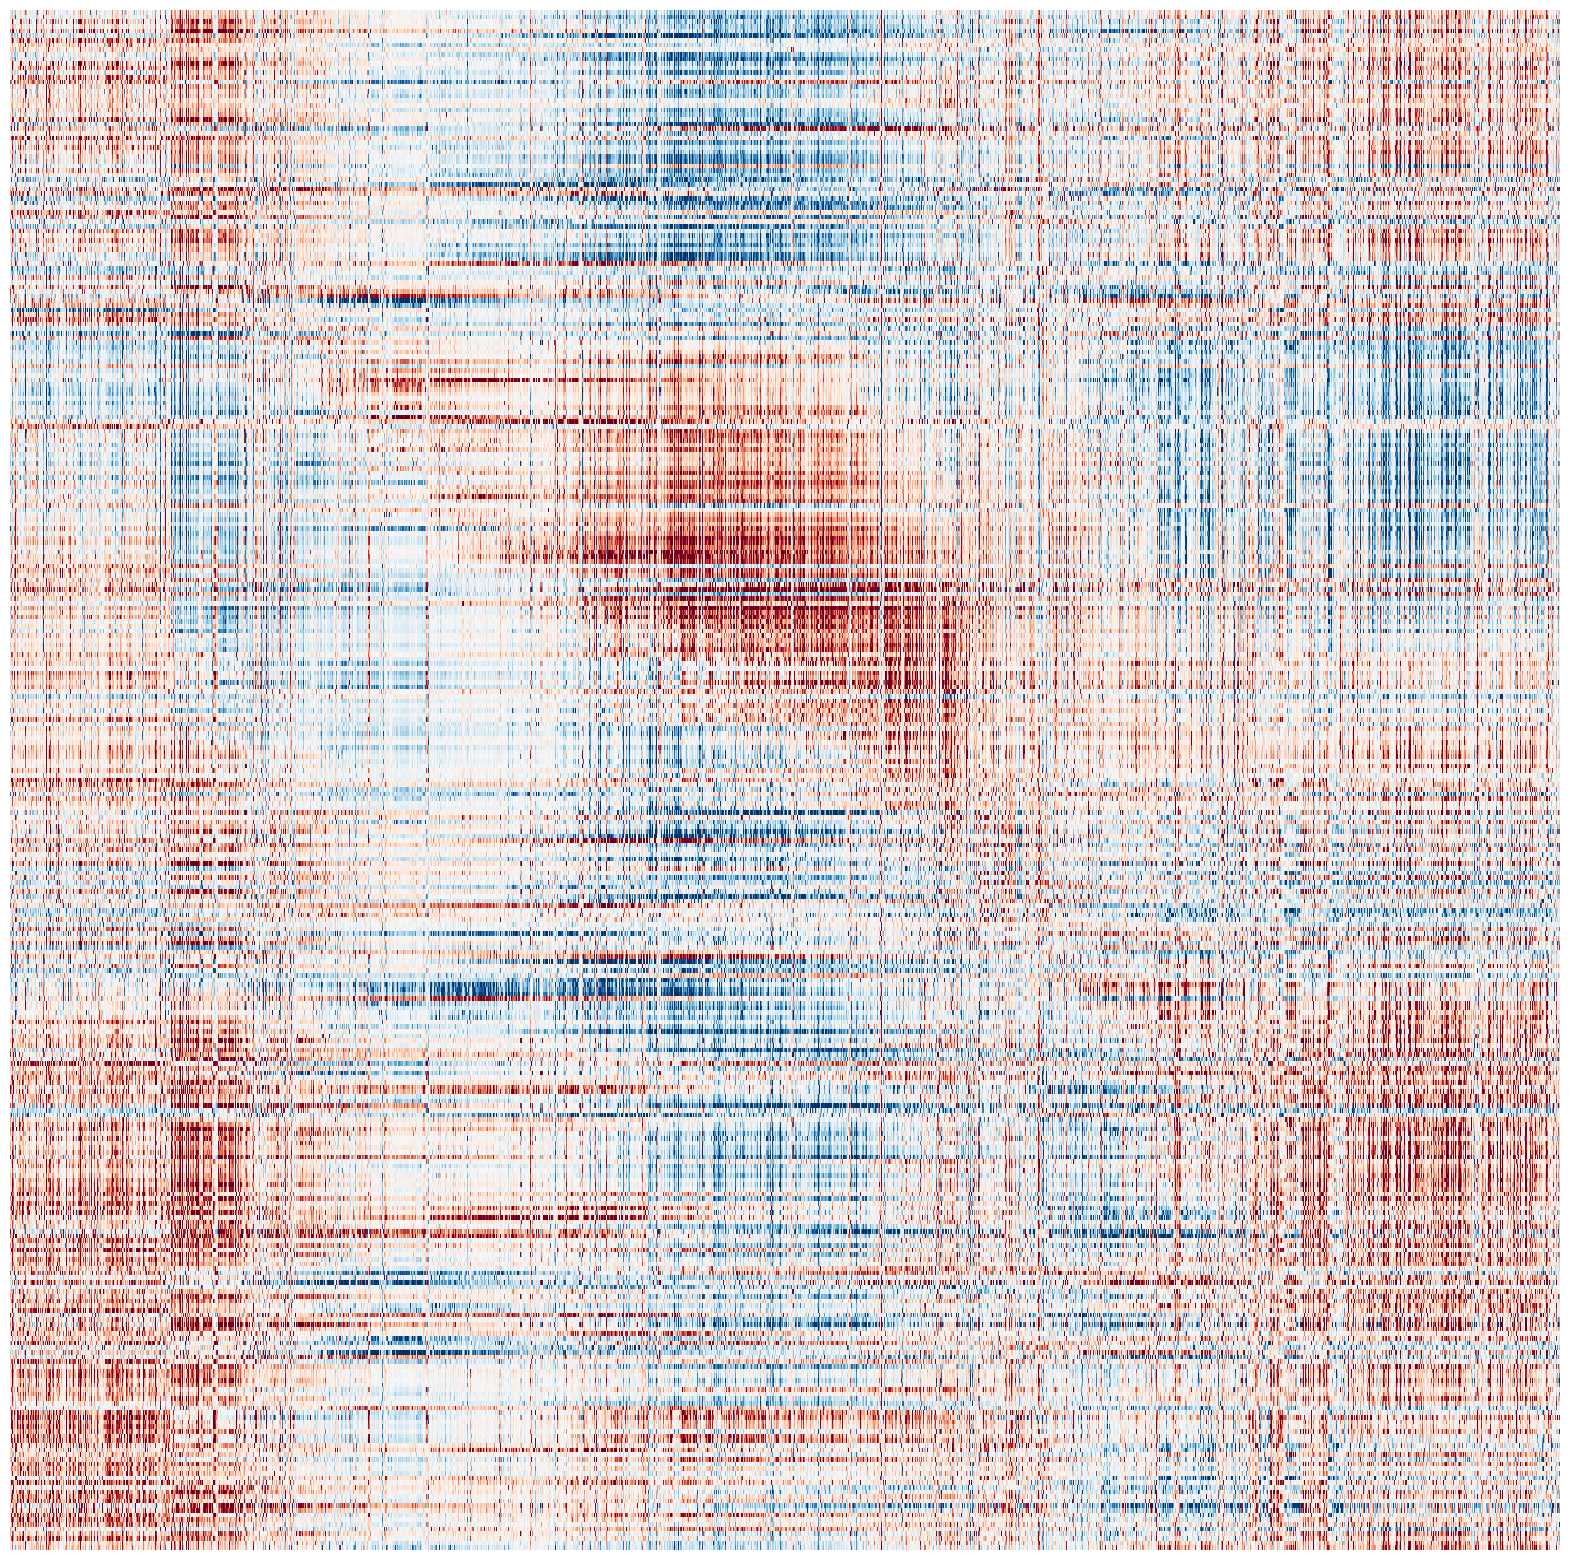

In [81]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_reordered, cmap='RdBu_r', center=0)
plt.xticks([])
plt.yticks([])
plt.gca().collections[0].colorbar.remove()
plt.savefig(save_path + 'granger_signed_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [79]:
df_reordered.to_csv(save_path + 'granger_signed_reordered.csv')

In [80]:
assert False

AssertionError: 

In [67]:
from sklearn.cluster import KMeans

km = KMeans(random_state=42, n_clusters=5)
km.fit(trends_df)
cluster_labels = km.labels_
start_vals = [km.cluster_centers_[i][0] for i in range(km.n_clusters)]
sorted_indices = np.argsort(start_vals)[::-1]  # Sort indices in descending order
reorder_map = {old_label: new_label for new_label, old_label in enumerate(sorted_indices)}
reordered_labels = np.array([reorder_map[label] for label in cluster_labels])
cluster_labels = reordered_labels + 1

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


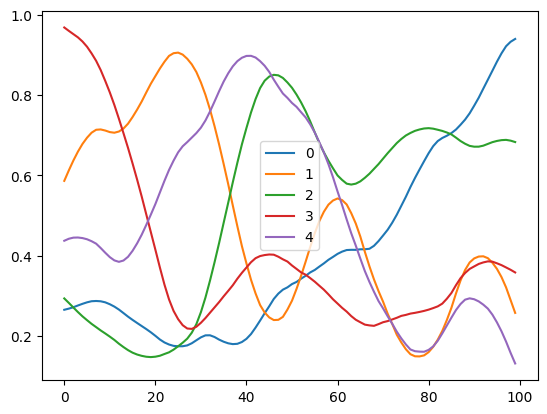

In [68]:
for i in range(len(np.unique(km.labels_))):
    plt.plot(km.cluster_centers_[i], label=i)
plt.legend()
# plt.ylim(-2.5, 2.5)

In [69]:
sorted_df = trends_df.iloc[np.argsort(cluster_labels)]

In [70]:
# Extract valid names for columns and rows
valid_cols = [name for name in sorted_df.index if name in signed_score_df.columns]
valid_rows = [name for name in sorted_df.index if name in signed_score_df.index]

# Reorder the DataFrame
df_reordered = signed_score_df.loc[valid_rows, valid_cols]

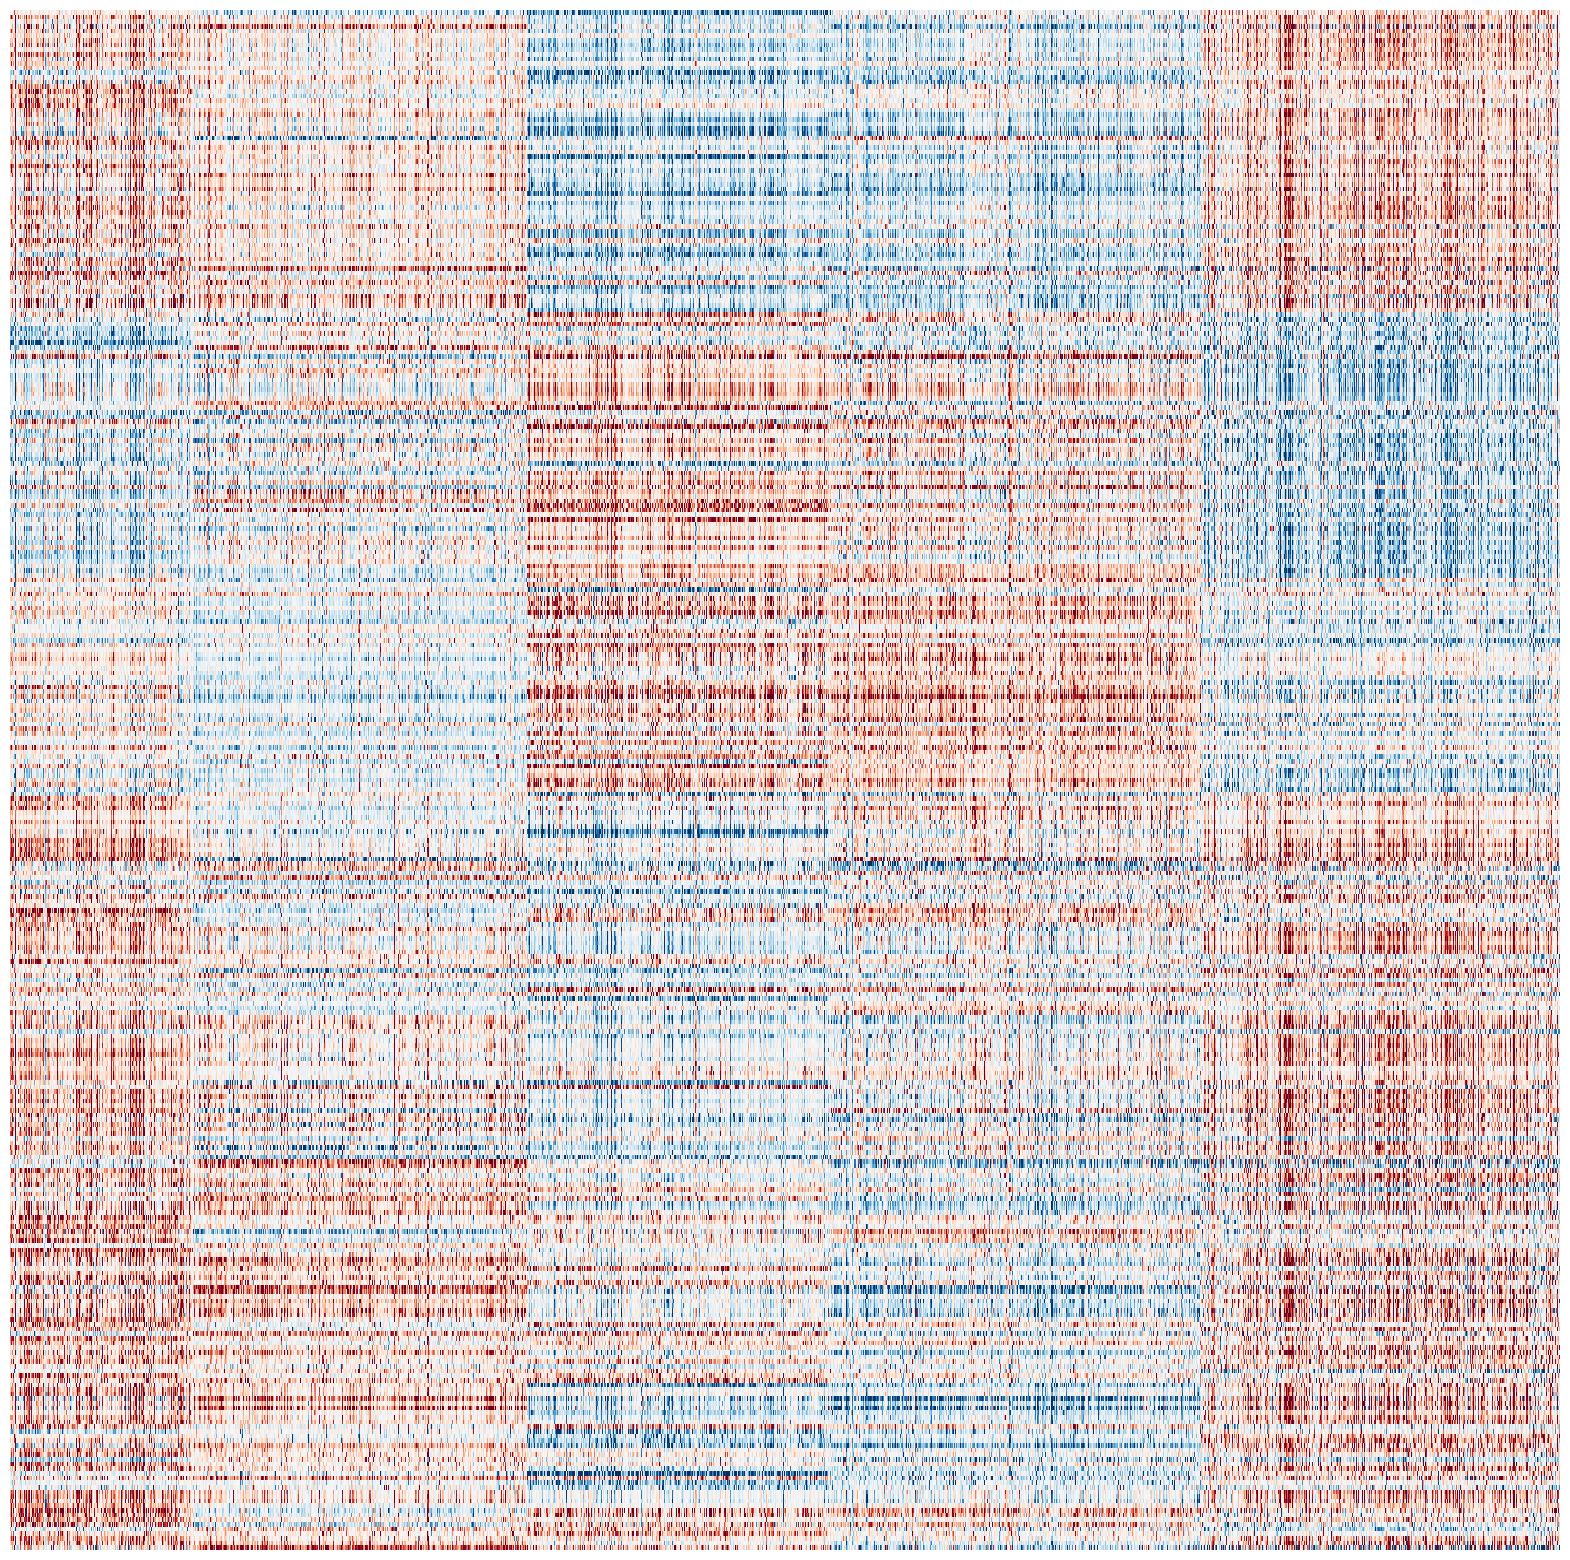

In [71]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_reordered, cmap='RdBu_r', center=0)
plt.xticks([])
plt.yticks([])
plt.gca().collections[0].colorbar.remove()
plt.show()
